In [96]:
# 29/04/20- plotting map of settling onset time and max depth

import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np 
import math
from pylab import *

dirwrite = '/home/dlobelle/Kooi_data/data_output/tests/rho_920kgm-3/'

data = Dataset(dirwrite +'-170to0lon_Kooi+NEMO_3D_grid10by10_rho920_r1e-05_30days_60dtsecs_5hrsoutdt.nc','r') 
z_all = data['z']

time = data.variables['time'][1,:]/86400
lons=data.variables['lon'][:] #,:,:]
lats=data.variables['lat'][:] #,:,:]
depths =data.variables['z']#[:,:,:] 

#print(z_all.shape[1])

In [97]:
# find the first time where particles sink below 1 m 

z_set = []
z_max = []
for i in range (depths.shape[0]):
    z0 = np.array(depths[i,:])
    z1 = (np.where(z0 > 1.))
    z2 = z1[0]
    if not z2.any(): 
        z_set.append(0) #continue
    else:
        z_set.append(z2[0])
        
    # find maximum depth of sinking particles
    z_max.append(max(z0))
    #z_max.append(z0[i_max])

t_set = time[z_set]
i_noset = np.where(t_set==0)

#print(np.array(z_max))

/home/dlobelle/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


/home/dlobelle/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


Text(0.5, 1.0, 'Settling onset time [days]')

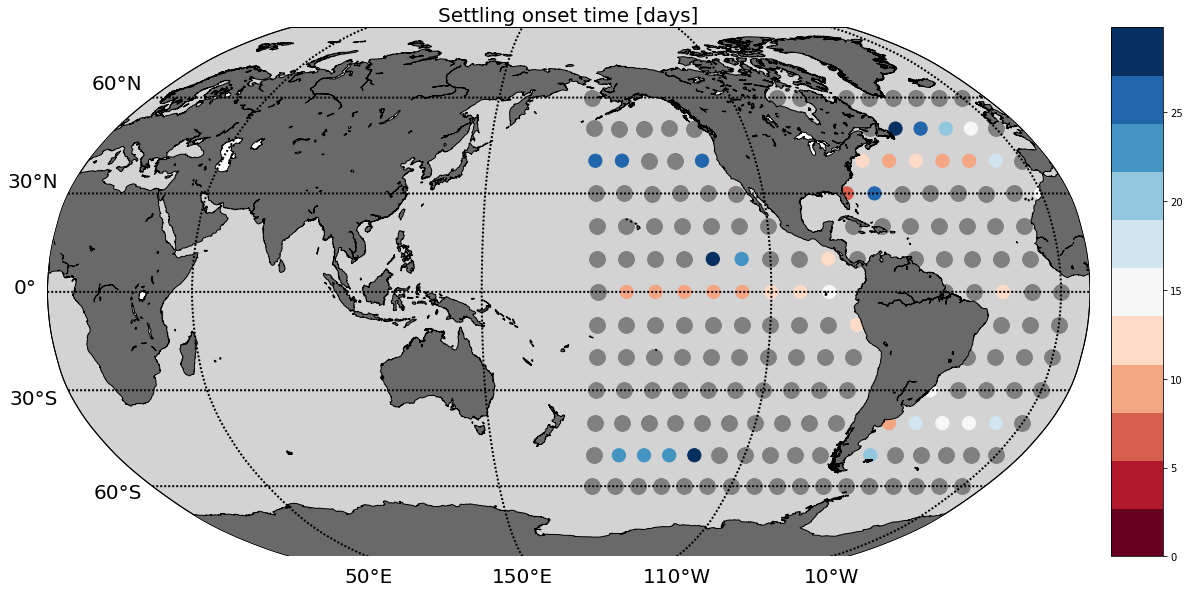

In [98]:
# plot basemap 

cmap = cm.get_cmap('RdBu', 11) 

fig = plt.figure(figsize=(20, 10))

m = Basemap(projection='robin',lon_0=-180,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='dimgrey')
m.drawmapboundary(fill_color='lightgray')
m.drawparallels(np.array([-60,-30,0,30,60]), labels=[True, False, False, True], linewidth=2.0, size=20)
m.drawmeridians(np.array([50,150,250,350]), labels=[False, False, False, True], linewidth=2.0, size=20)

xs, ys = m(lons[:,0], lats[:,0])
xn, yn = m(lons[i_noset,0],lats[i_noset,0])
#print(xs)
scat = m.scatter(xs, ys, marker='.', c=t_set,cmap = cmap, s = 700)
m.colorbar()
m.scatter(xn,yn, marker= '.', c = 'grey',s = 1000)
plt.title('Settling onset time [days]',size = 20)
#m.scatter(xs,ys,t_set==0, marker= 'o', c = 'r')


/home/dlobelle/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Maximum settling depth [m]')

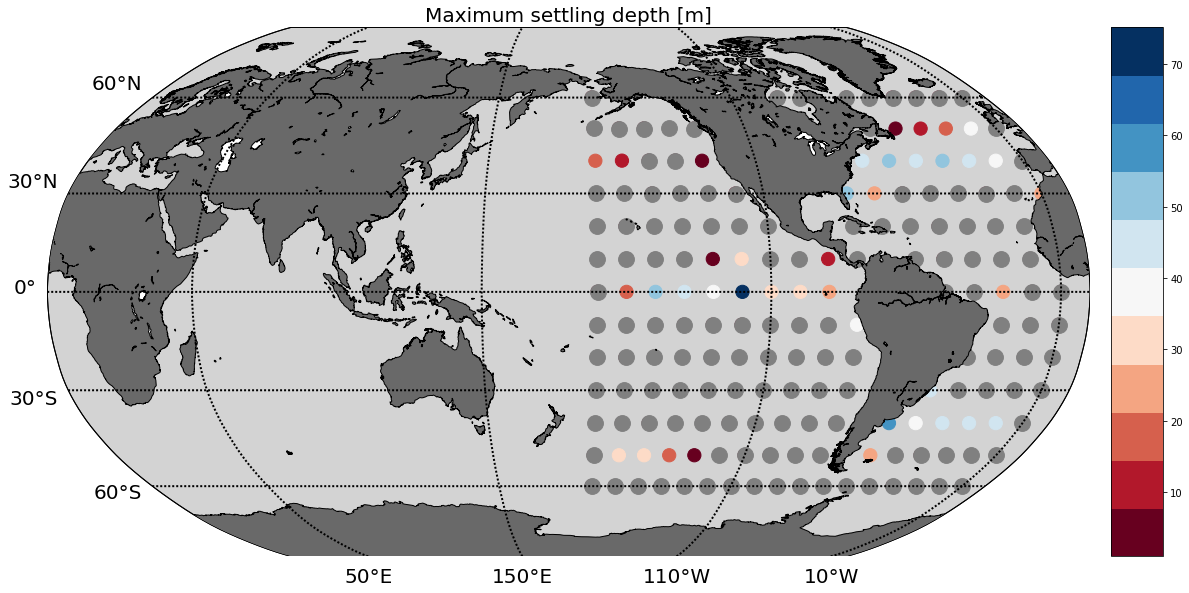

In [99]:
# plot basemap 
fig = plt.figure(figsize=(20, 10))

m = Basemap(projection='robin',lon_0=-180,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='dimgrey')
m.drawmapboundary(fill_color='lightgray')
m.drawparallels(np.array([-60,-30,0,30,60]), labels=[True, False, False, True], linewidth=2.0, size=20)
m.drawmeridians(np.array([50,150,250,350]), labels=[False, False, False, True], linewidth=2.0, size=20)

xs, ys = m(lons[:,0], lats[:,0])
xn, yn = m(lons[i_noset,0],lats[i_noset,0])
#print(xs)
scat = m.scatter(xs, ys, marker='.', c=z_max,cmap = cmap, s = 700)
m.colorbar()
m.scatter(xn,yn, marker= '.', c = 'grey',s = 1000)
plt.title('Maximum settling depth [m]',size = 20)
#m.scatter(xs,ys,t_set==0, marker= 'o', c = 'r')